In [11]:
import cv2

# 이미지 로드
image = cv2.imread('/Users/mac/Dev/Project/ThermalCamera/Model/dataset/train/with_human/2023-09-11 05-33-46.mp4_4.png')

# 이미지의 차원 확인
height, width, channels = image.shape

# 채널 수에 따라 이미지 유형 확인
if channels == 1:
    print("이미지는 1채널 (그레이스케일) 이미지입니다.")
elif channels == 3:
    print("이미지는 3채널 (RGB) 이미지입니다.")
else:
    print("이미지의 채널 수가 1 또는 3이 아닙니다.")


이미지는 3채널 (RGB) 이미지입니다.


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 하이퍼파라미터 설정
image_height = 24
image_width = 32
batch_size = 32
epochs = 10


1. 데이터 전처리

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터셋 경로 설정
dataset_dir = '/Users/mac/Dev/Project/ThermalCamera/Model/Classification/dataset/'
with_human_dir = os.path.join(dataset_dir, 'train', 'with_human')
without_human_dir = os.path.join(dataset_dir, 'train', 'without_human')
# print(with_human_dir)
# 이미지 파일 목록 읽기
with_human_images = [os.path.join(with_human_dir, filename) for filename in os.listdir(with_human_dir)]
without_human_images = [os.path.join(without_human_dir, filename) for filename in os.listdir(without_human_dir)]
# print(with_human_images)
# 이미지 파일 경로와 레이블(1 또는 0)을 저장할 리스트 초기화
data = []
labels = []

# 'with_human' 이미지와 레이블(1) 추가
for image_path in with_human_images:
    if not image_path.endswith('.DS_Store'):  # .DS_Store 파일 건너뛰기
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 읽어옴
        image = cv2.resize(image, (image_width, image_height))  # 이미지 크기 조절
        data.append(image)
        labels.append(1)

# 'without_human' 이미지와 레이블(0) 추가
for image_path in without_human_images:
    if not image_path.endswith('.DS_Store'):  # .DS_Store 파일 건너뛰기
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (image_width, image_height))
        data.append(image)
        labels.append(0)



# 데이터를 NumPy 배열로 변환
data = np.array(data, dtype=np.float32)
labels = np.array(labels)

# 데이터를 0에서 1 사이의 값으로 정규화
data /= 255.0

# 첫 번째 호출로 훈련 데이터와 검증 데이터 생성
train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# 두 번째 호출로 테스트 데이터 생성 (훈련 데이터를 기반으로 생성하지 않음)
data_temp, test_data, labels_temp, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# 데이터의 shape 확인
print("Train data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)
print("Test data shape:", test_data.shape)




Train data shape: (628, 24, 32)
Validation data shape: (157, 24, 32)
Test data shape: (157, 24, 32)


2. CNN 모델 아키텍쳐 정의

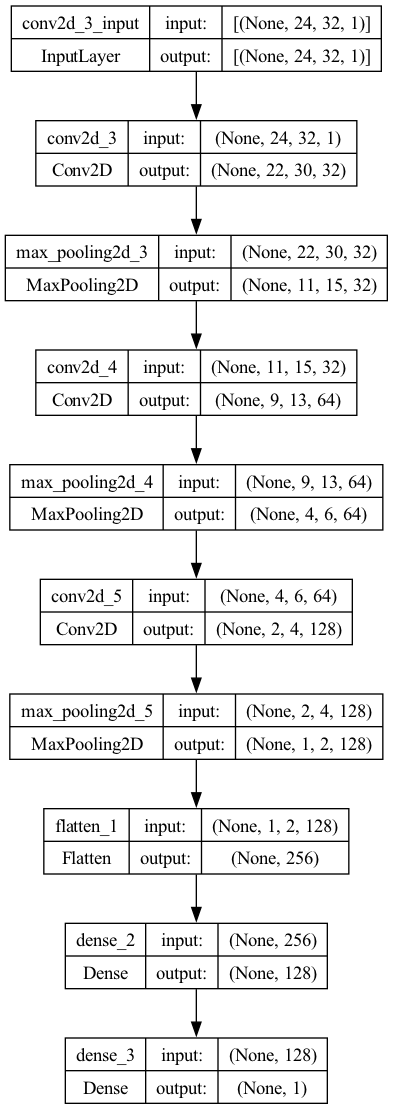

In [24]:
from tensorflow.keras.utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)



model training

In [25]:
model.fit(
    train_data,  # 훈련 데이터
    train_labels,  # 훈련 레이블
    epochs=epochs,  # 에포크 횟수
    validation_data=(validation_data, validation_labels),  # 검증 데이터
    batch_size=batch_size  # 배치 크기
)


Epoch 1/10


2023-09-21 13:13:03.094786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.7611

2023-09-21 13:13:08.856424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 8s 265ms/step - loss: 0.3783 - accuracy: 0.7611 - val_loss: 0.2558 - val_accuracy: 0.7516
Epoch 2/10
20/20 [==============================] - 0s 13ms/step - loss: 0.1644 - accuracy: 0.9379 - val_loss: 0.0723 - val_accuracy: 0.9936
Epoch 3/10
20/20 [==============================] - 0s 13ms/step - loss: 0.0430 - accuracy: 0.9873 - val_loss: 0.0192 - val_accuracy: 0.9936
Epoch 4/10
20/20 [==============================] - 0s 13ms/step - loss: 0.0707 - accuracy: 0.9857 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0424 - accuracy: 0.9920 - val_loss: 0.0113 - val_accuracy: 0.9936
Epoch 6/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0120 - val_accuracy: 0.9936
Epoch 8/10
20/20 [=====

모델 평가

In [26]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy}")


5/5 [==============================] - 0s 6ms/step - loss: 0.0076 - accuracy: 0.9936
Test accuracy: 0.993630588054657


In [27]:
import cv2
import numpy as np

# 이미지 파일 경로 설정
img_path = '/Users/mac/Dev/Project/ThermalCamera/Model/Classification/all_img/meter.mp4/meter.mp4_0.png'

# 이미지 읽기 및 전처리
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 읽어옴
image = cv2.resize(image, (image_width, image_height))  # 이미지 크기 조절
image = image.astype(np.float32) / 255.0  # 정규화

# 모델에 이미지 입력
predictions = model.predict(np.expand_dims(image, axis=0))  # 이미지를 배치 차원을 추가하여 모델에 전달

print(predictions)


[ WARN:0@1466.323] global loadsave.cpp:248 findDecoder imread_('/Users/mac/Dev/Project/ThermalCamera/Model/dataset/train/with_human/2023-09-11 05-33-46.mp4_28.png'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


모델 저장

In [21]:
model.save("detect.h5")  # 모델 저장

/Users/mac/anaconda3/envs/tf2/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Transfer Learning

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

# 하이퍼파라미터 설정
image_height = 24
image_width = 32
batch_size = 32
epochs = 30


In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터셋 경로 설정
dataset_dir = '/Users/mac/Dev/Project/ThermalCamera/Model/Classification/dataset/transferLearning/'
with_human_dir = os.path.join(dataset_dir, 'with_humans')
without_human_dir = os.path.join(dataset_dir, 'without_human')
# print(with_human_dir)
# 이미지 파일 목록 읽기
with_human_images = [os.path.join(with_human_dir, filename) for filename in os.listdir(with_human_dir)]
without_human_images = [os.path.join(without_human_dir, filename) for filename in os.listdir(without_human_dir)]
# print(with_human_images)
# 이미지 파일 경로와 레이블(1 또는 0)을 저장할 리스트 초기화
data = []
labels = []

# 'with_human' 이미지와 레이블(1) 추가
for image_path in with_human_images:
    if not image_path.endswith('.DS_Store'):  # .DS_Store 파일 건너뛰기
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # 이미지를 흑백으로 읽어옴
        image = cv2.resize(image, (image_width, image_height))  # 이미지 크기 조절
        data.append(image)
        labels.append(1)

# 'without_human' 이미지와 레이블(0) 추가
for image_path in without_human_images:
    if not image_path.endswith('.DS_Store'):  # .DS_Store 파일 건너뛰기
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (image_width, image_height))
        data.append(image)
        labels.append(0)



# 데이터를 NumPy 배열로 변환
data = np.array(data, dtype=np.float32)
labels = np.array(labels)

# 데이터를 0에서 1 사이의 값으로 정규화
data /= 255.0

# 첫 번째 호출로 훈련 데이터와 검증 데이터 생성
train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size=0.1, random_state=42)

# 두 번째 호출로 테스트 데이터 생성 (훈련 데이터를 기반으로 생성하지 않음)
data_temp, test_data, labels_temp, test_labels = train_test_split(data, labels, test_size=0.1, random_state=42)

# 데이터의 shape 확인
print("Train data shape:", train_data.shape)
print("Validation data shape:", validation_data.shape)
print("Test data shape:", test_data.shape)




Train data shape: (414, 24, 32)
Validation data shape: (46, 24, 32)
Test data shape: (46, 24, 32)


In [8]:
model_path = '/Users/mac/Dev/Project/ThermalCamera/Model/Classification/detect.h5'

# 모델 로드
loaded_model = load_model(model_path)

# 추가로 학습시킬 데이터를 준비
# X_train: 입력 데이터, y_train: 목표 출력 데이터
# 예를 들어, 다음과 같이 데이터를 로드할 수 있습니다.
# X_train, y_train = load_data()

# 모델 컴파일 (필요에 따라 옵티마이저, 손실 함수 등을 조정)
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2023-09-21 13:02:46.764720: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-09-21 13:02:46.764755: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-09-21 13:02:46.764759: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-09-21 13:02:46.765191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-21 13:02:46.765564: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
loaded_model.fit(
    train_data,  # 훈련 데이터
    train_labels,  # 훈련 레이블
    epochs=epochs,  # 에포크 횟수
    validation_data=(validation_data, validation_labels),  # 검증 데이터
    batch_size=batch_size  # 배치 크기
)

Epoch 1/30
13/13 [==============================] - 1s 58ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - val_loss: 0.0000e+00 - val_accuracy: 0.2826
Epoch 2/30
13/13 [==============================] - 1s 55ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - val_loss: 0.0000e+00 - val_accuracy: 0.2826
Epoch 3/30
13/13 [==============================] - 1s 54ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - val_loss: 0.0000e+00 - val_accuracy: 0.2826
Epoch 4/30
13/13 [==============================] - 1s 56ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - val_loss: 0.0000e+00 - val_accuracy: 0.2826
Epoch 5/30
13/13 [==============================] - 1s 56ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - val_loss: 0.0000e+00 - val_accuracy: 0.2826
Epoch 6/30
13/13 [==============================] - 1s 56ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - val_loss: 0.0000e+00 - val_accuracy: 0.2826
Epoch 7/30
13/13 [==============================] - 1s 56ms/step - loss: 0.0000e+00 - accuracy: 0.2754 - v